https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

Get the Suicides_rate data set from the above link

In [23]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [244]:
# Read the dataset

df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.shape

(27820, 12)

In [5]:
#check the null values

df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [16]:
# get the information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Insights:
- change the column names for convinience
- gdp_for_year($) : is object type. convert into numerical by removing commas
- HDI for year : has missing values. Will fill before modeling
- suicides/100k_pop =((suicides_no)/(population/1000)*100)


In [245]:
# as there is a space in names of 2 variables, its better to change the names for the convinience

df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'HDI_for_year',
       'gdp_for_year($)', 'gdp_per_capita($)', 'generation']

### Data analysis

In [9]:
# get the unique values for every categorical variables
for i in df.columns:
    if df[i].dtype == type(object):
        print(i,end=': ')
        print('\n', df[i].unique())
        print()

country: 
 ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Sloveni

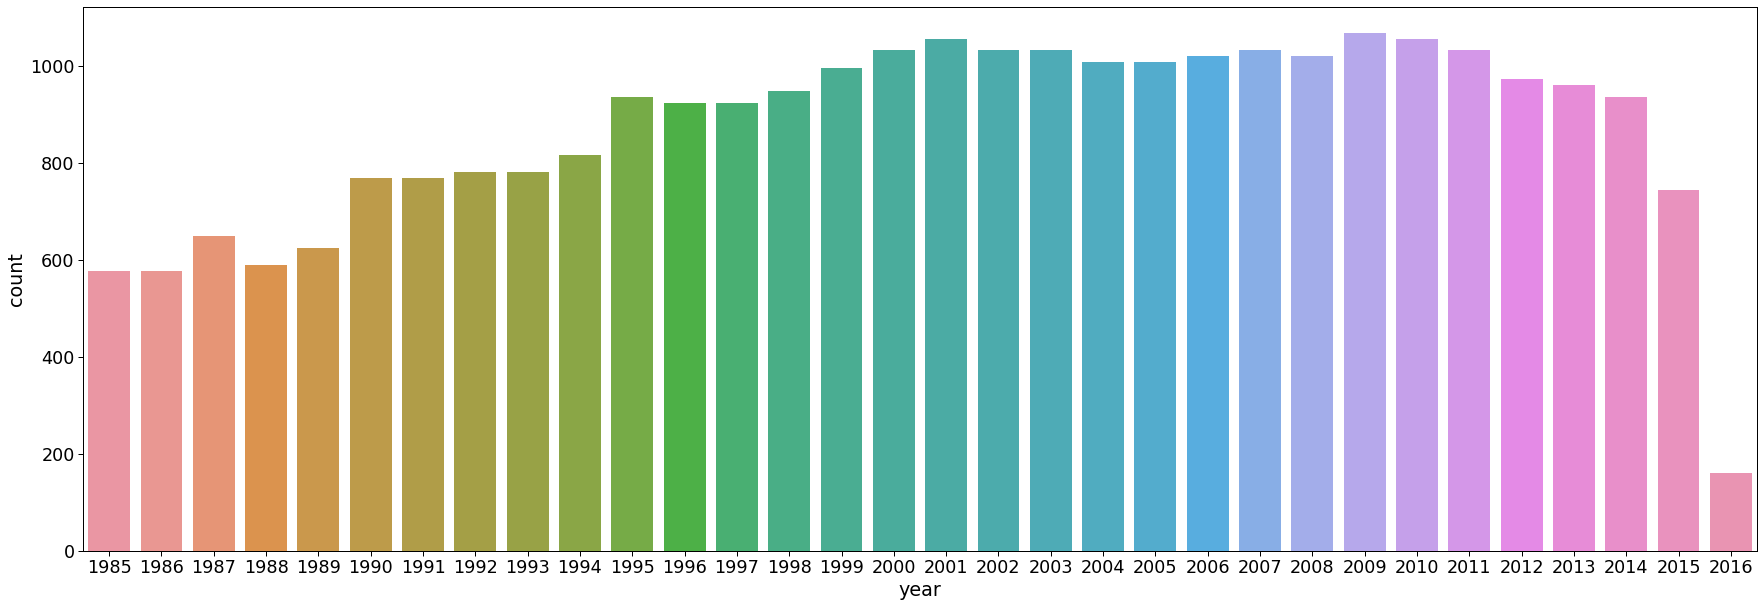

In [135]:
# Check the number of data for each year( not suicide rate)
# df['year'].value_counts()
# or

plt.figure(figsize=(30,10))
y = df['year']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='count')

Insight: Here we can see 2016 data is very low(160).

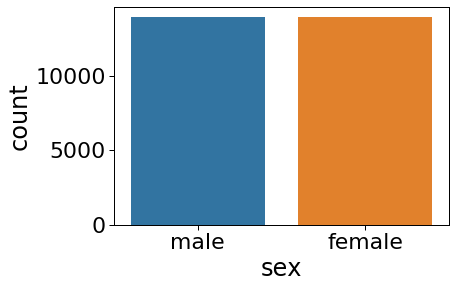

In [27]:
# check the number of data for gender
y = df['sex']
sns.set_context("paper", 2.5, {"lines.linewidth":4})
sns.countplot(y,label='count')

Insight: data is collected equally for both male and female

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

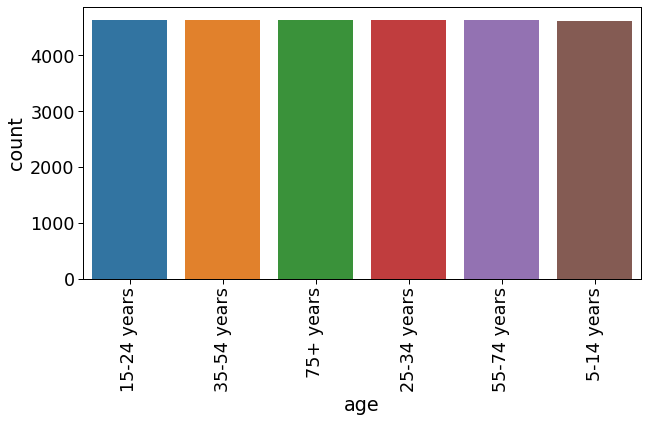

In [42]:
# to check the number of data for each age
plt.figure(figsize=(10,5))
y = df['age']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='count')
plt.xticks(rotation=90)

Insight: data is almost equally collected for all age groups

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

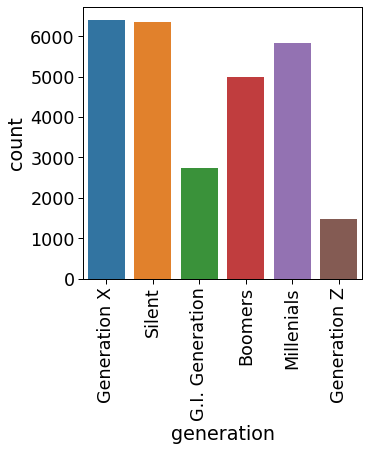

In [41]:
# check the number of data for Generations

# G.I. Generation…1900 - 1924
# Silent…1925 - 1942
# Boomers…1946 - 1964
# Generation X …1965 - 1980
# Millenials…1981 - 2000
# Generation Z…2001 - 2010


plt.figure(figsize=(5,5))
y = df['generation']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='generation')
plt.xticks(rotation=90)

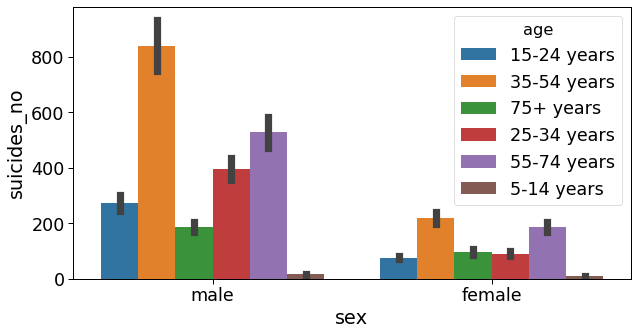

In [38]:
# Number of suicides based on gender and age

plt.figure(figsize=(10,5))
sns.barplot(x='sex', y='suicides_no', hue='age', data=df)

We can observe that the suicide rate is higher in the age group of 35-54 years and 55-74 years in both female and male populations and it is lowest in age group of 5-14 years.

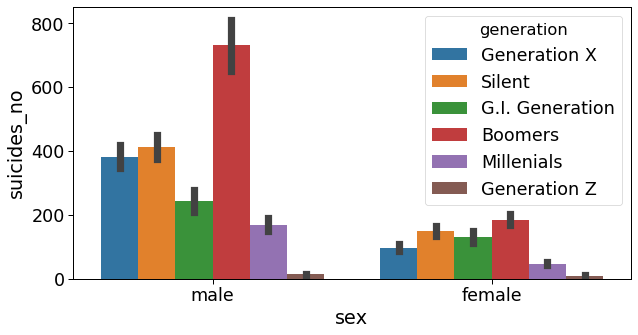

In [44]:
# observe suicide rate based on sex, generation
plt.figure(figsize=(10,5))
sns.barplot(x='sex', y='suicides_no', hue='generation', data=df)

we can see that suicide numbers are higher in the generation of Boomers, whereas it is lowest in Generation Z

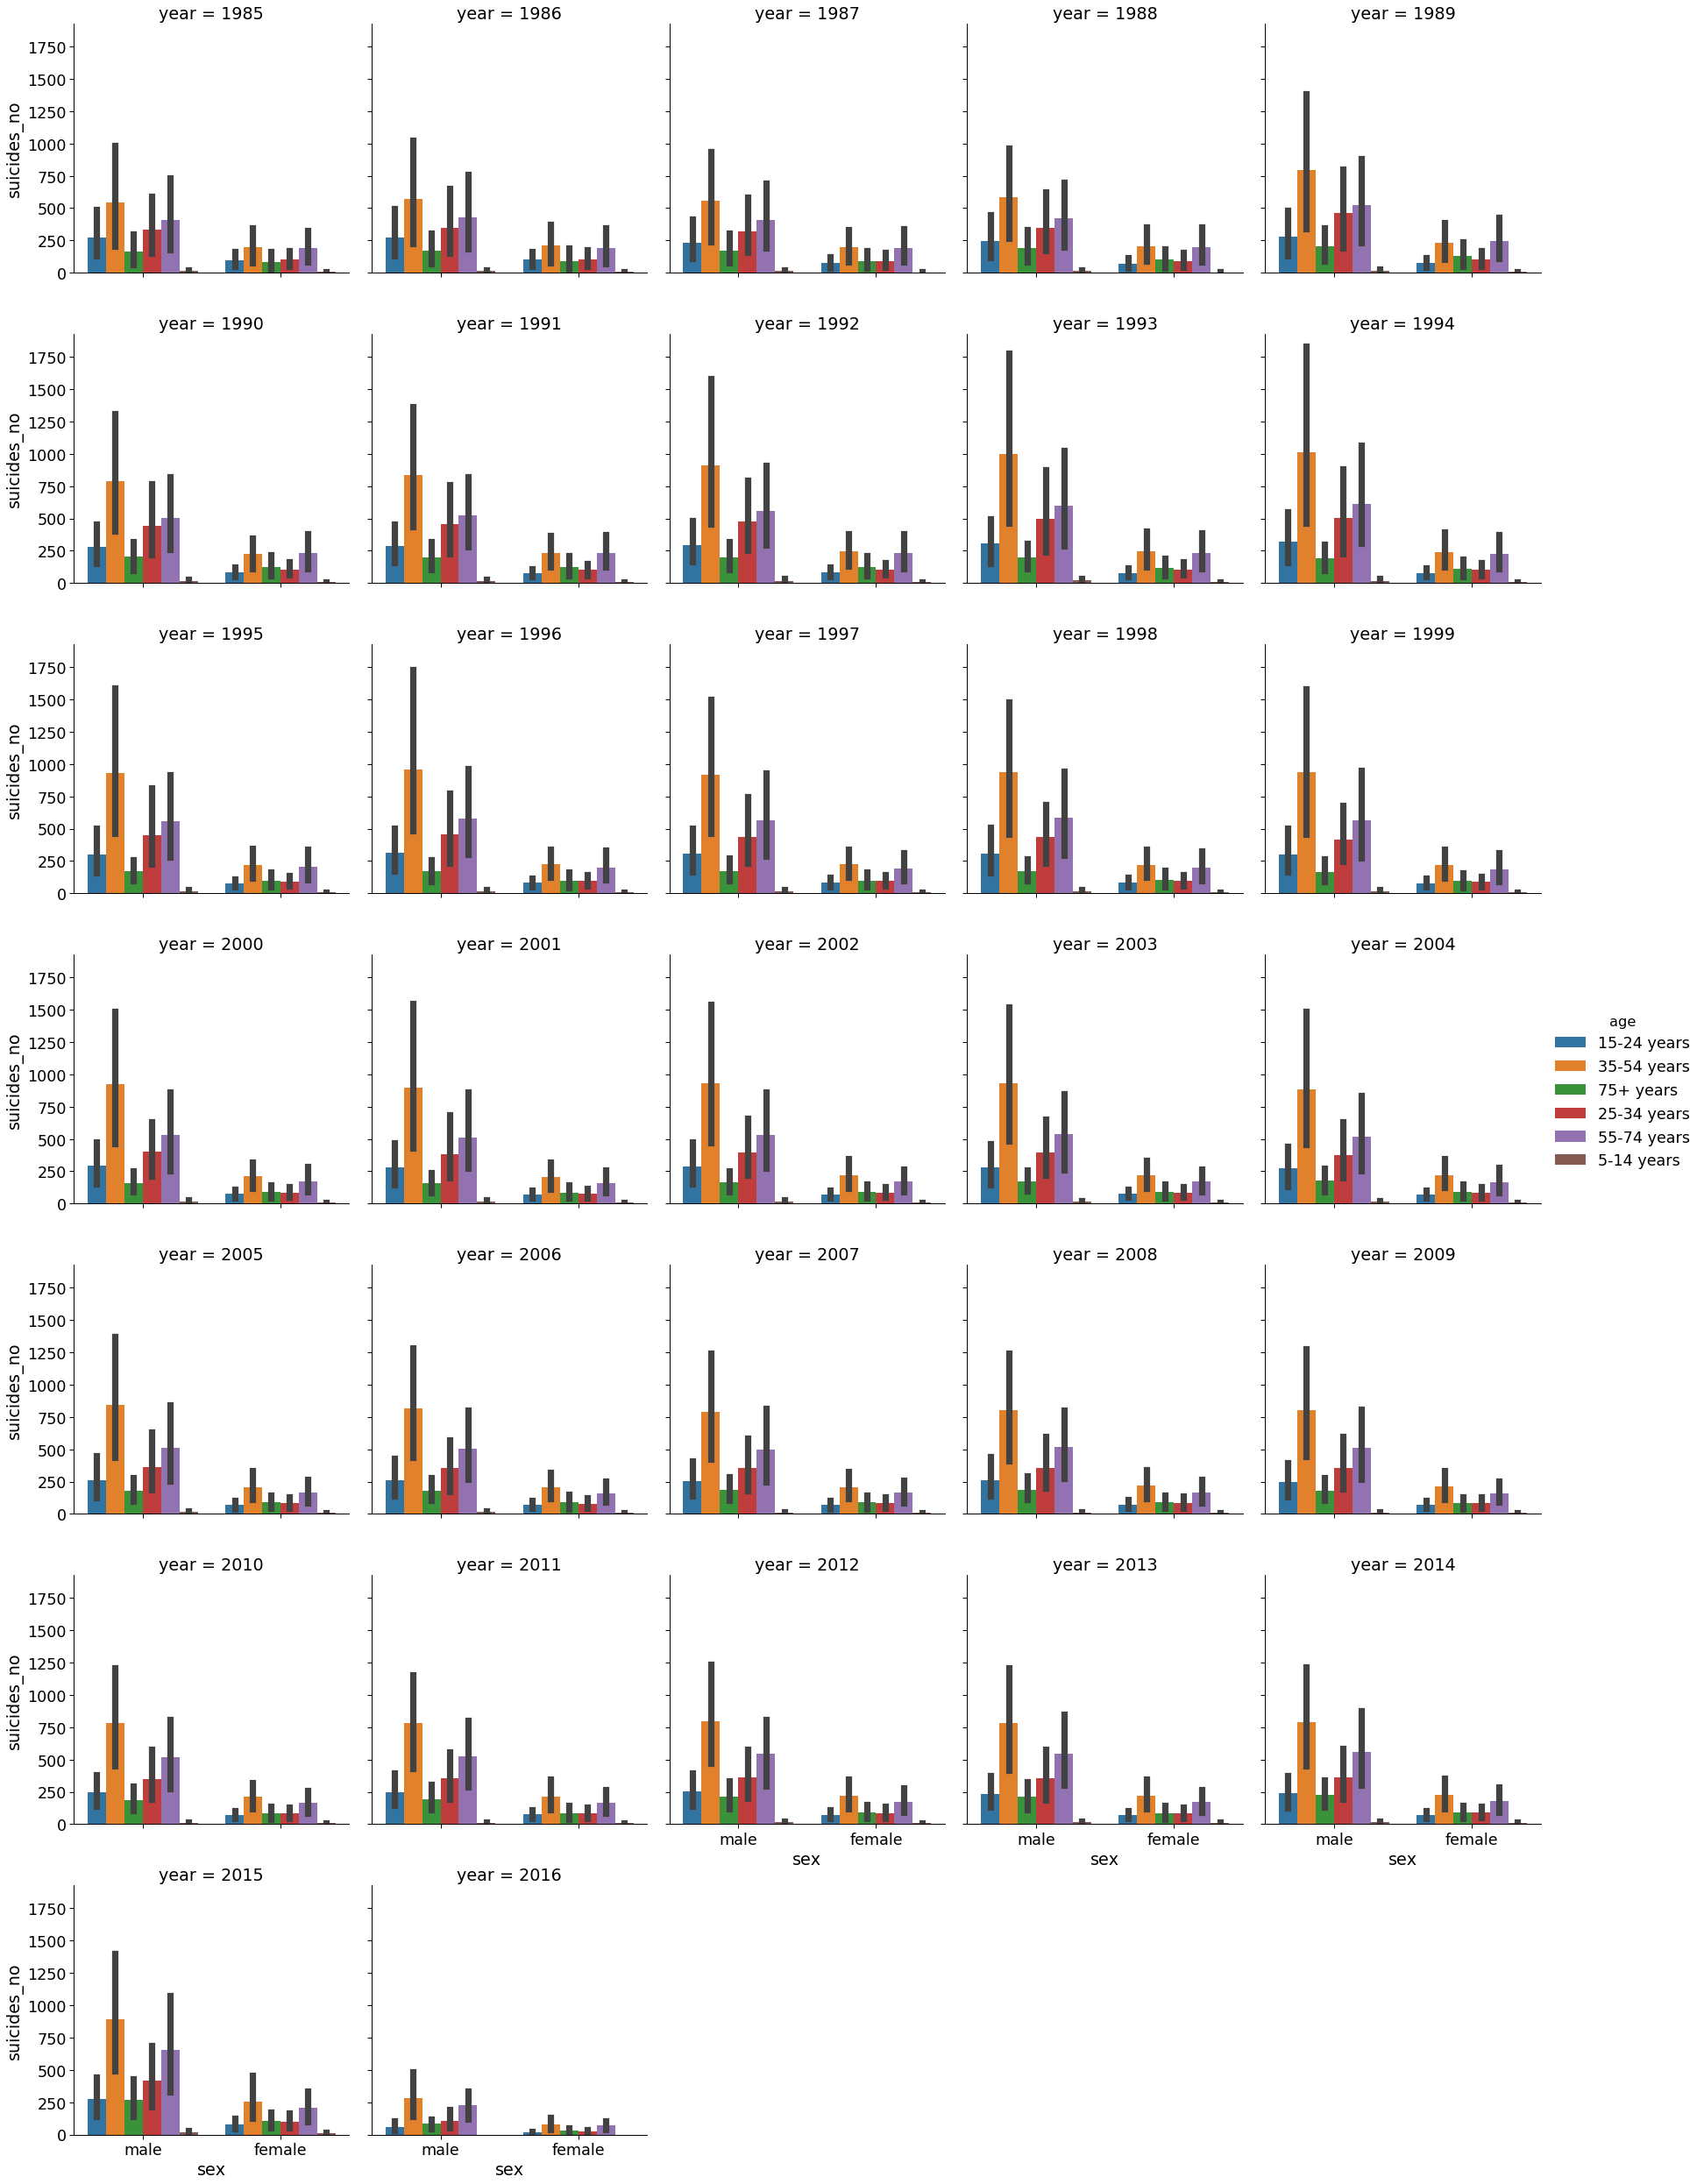

In [45]:
# observe suicide rate based on sex and age for different years

sns.catplot('sex','suicides_no',hue='age',col='year',data=df,kind='bar',col_wrap=5)

Insight: Suicide rates are decreasing globally

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

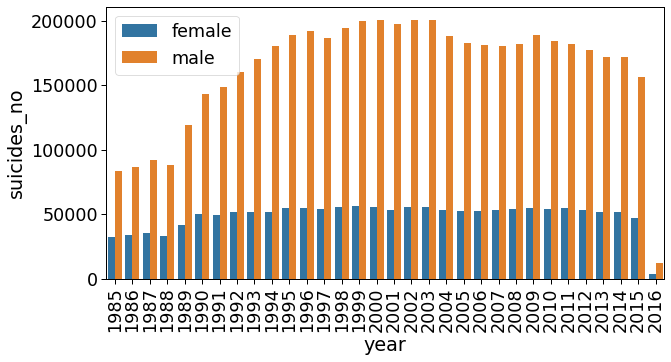

In [87]:
# observe suicide rates for sex and year
data=pd.DataFrame(df.groupby(['sex','year'])['suicides_no'].sum().reset_index())

plt.figure(figsize=(10,5))
sns.barplot(x='year', y='suicides_no', hue='sex', data=data)
plt.legend()
plt.xticks(rotation=90)

Insight: 
- Suicide rate for male increased in 1990's. then started decresing from 2003
- There is not much data collected for 2016

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

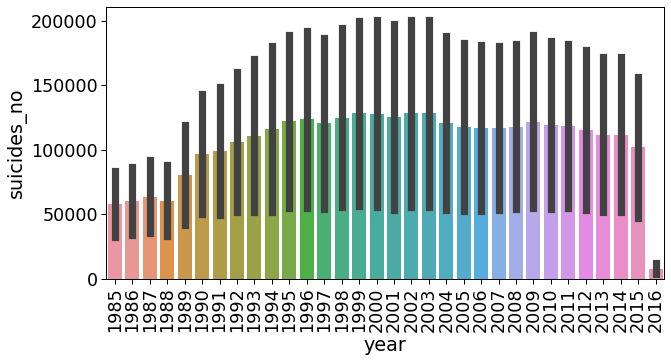

In [57]:
# observe suicide rate for years
plt.figure(figsize=(10,5))
sns.barplot(x='year', y='suicides_no',  data=data)
plt.xticks(rotation=90)

Insight: suicide rate increased in 90's

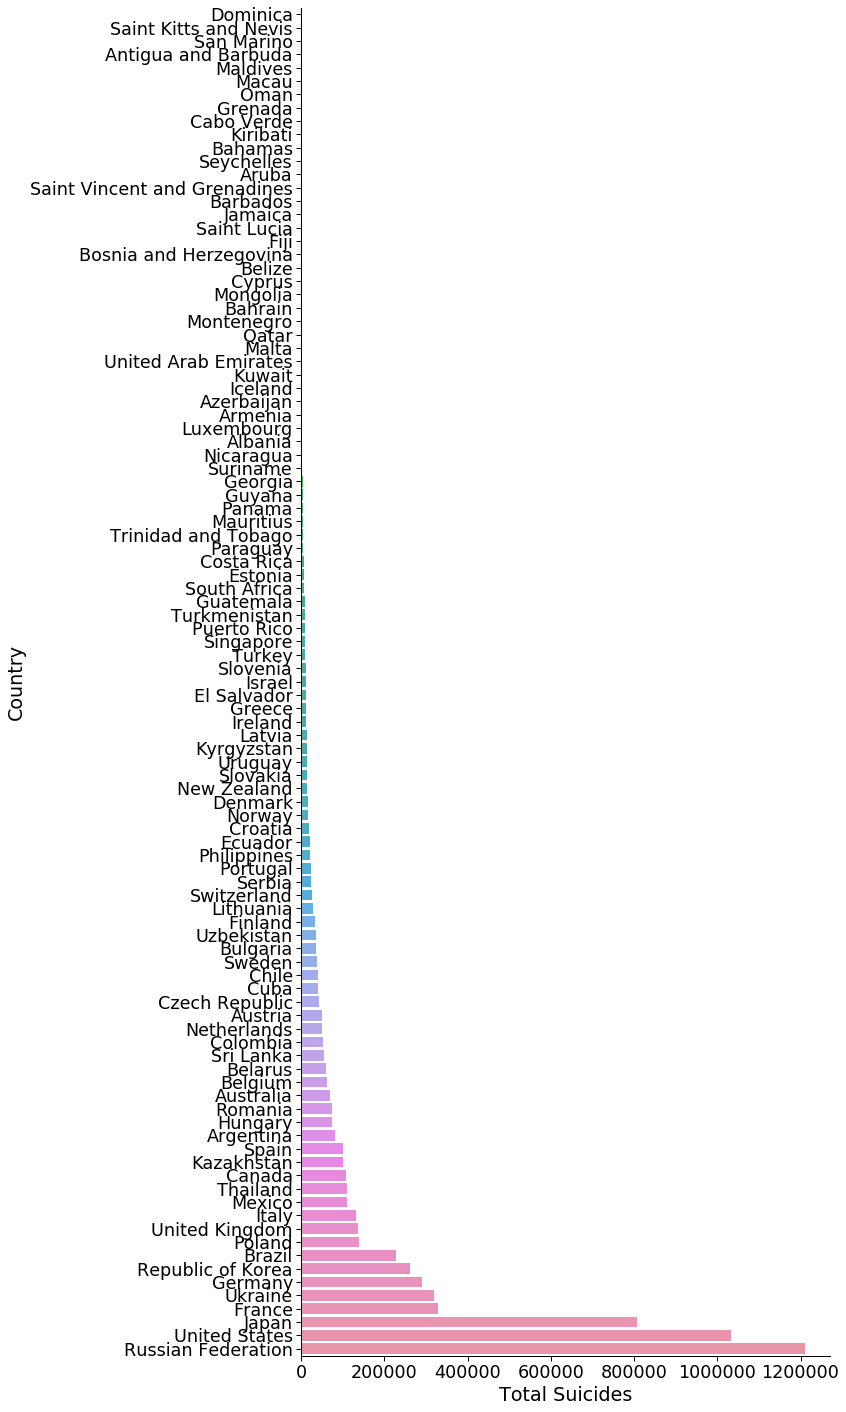

In [75]:
# country wise suicides rates
d=pd.DataFrame(df.groupby('country')['suicides_no'].sum().reset_index().sort_values('suicides_no'))

ax=sns.catplot(x='suicides_no', y='country', 
            data=d, kind="bar", height=20, aspect=0.6)
ax.set(xlabel='Total Suicides', ylabel='Country')
plt.show()

We can get top and bottom suicide rate countries

In [137]:
# country-year wise suicides rates
d=pd.DataFrame(df.groupby(['country-year'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']))

d

,country-year,suicides_no
1180,Kiribati1999,0
1417,Montenegro2003,0
877,Grenada2001,0
1418,Montenegro2004,0
40,Antigua and Barbuda2005,0
...,...,...
1759,Russian Federation2001,56958
1757,Russian Federation1999,56974
1754,Russian Federation1996,57511
1753,Russian Federation1995,60548


Insight: we can see countries(yearly based) with highest and lowest suicide rate 

In [94]:
df[['suicides/100k pop', 'year', 'gdp_per_capita ($)']].groupby('year').mean()


,suicides/100k pop,gdp_per_capita ($)
year,,
1985,11.826198,6091.229167
1986,11.423333,7126.104167
1987,11.644213,8712.592593
1988,12.709405,9983.857143
1989,12.879071,9725.038462
1990,12.862956,9806.328125
1991,13.438880,10132.937500
1992,13.498564,10506.707692
1993,13.833705,10553.584615


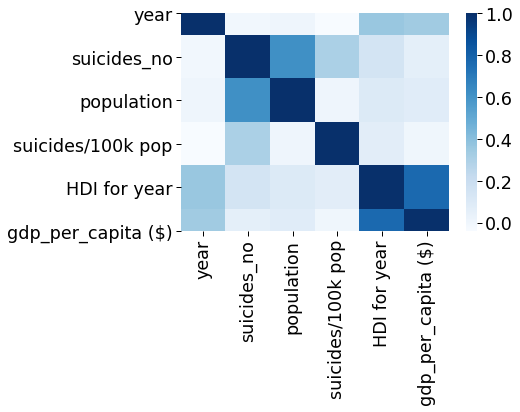

In [132]:
sns.heatmap(df.corr(),cmap='Blues')

In [121]:
# suicides rate vs gdp for every year

suicides_vs_gpd=df.groupby(['year'])['gdp_per_capita ($)','suicides/100k pop'].mean()
suicides_vs_gpd=suicides_vs_gpd.reset_index()
suicides_vs_gpd

,year,gdp_per_capita ($),suicides/100k pop
0,1985,6091.229167,11.826198
1,1986,7126.104167,11.423333
2,1987,8712.592593,11.644213
3,1988,9983.857143,12.709405
4,1989,9725.038462,12.879071
5,1990,9806.328125,12.862956
6,1991,10132.937500,13.438880
7,1992,10506.707692,13.498564
8,1993,10553.584615,13.833705
9,1994,11567.102941,14.073272


Insight: 
- suicideno/100K population was more in 1995 and low in 2014
- there is a weak positive correlation between gdp per capita and suiciderate

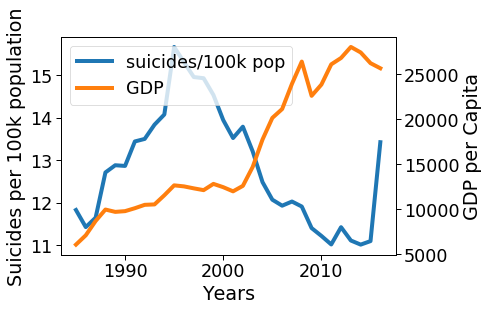

<Figure size 1440x720 with 0 Axes>

In [124]:
fig, ax1 = plt.subplots()

# Plot the suicides over the years.
lns1 = ax1.plot(suicides_vs_gpd['year'], suicides_vs_gpd['suicides/100k pop'], 'C0', label='suicides/100k pop')

# Create a shared axis for plotting on a different scale the GPD.
ax2 = ax1.twinx()
lns2 = ax2.plot(suicides_vs_gpd['year'], suicides_vs_gpd['gdp_per_capita ($)'], 'C1', label='GDP')

# Join both legends into the same box.
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)
plt.figure(figsize=(20,10))
# Set the labels.
ax1.set_ylabel('Suicides per 100k population')
ax2.set_ylabel('GDP per Capita')
ax1.set_xlabel('Years')

plt.tight_layout()
plt.show()

In [129]:
# suicide vs gdp for every country
suicides_vs_gpd=df.groupby(['country'])['gdp_per_capita ($)','suicides/100k pop'].mean()
suicides_vs_gpd=suicides_vs_gpd.reset_index()
suicides_vs_gpd

,country,gdp_per_capita ($),suicides/100k pop
0,Albania,1859.045455,3.502879
1,Antigua and Barbuda,10448.185185,0.552901
2,Argentina,7914.096774,10.469328
3,Armenia,1873.919463,3.275872
4,Aruba,24221.642857,9.503095
...,...,...,...
96,United Arab Emirates,42162.000000,1.317917
97,United Kingdom,31908.354839,7.502473
98,United States,39269.612903,13.819812
99,Uruguay,7622.071429,19.461190


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

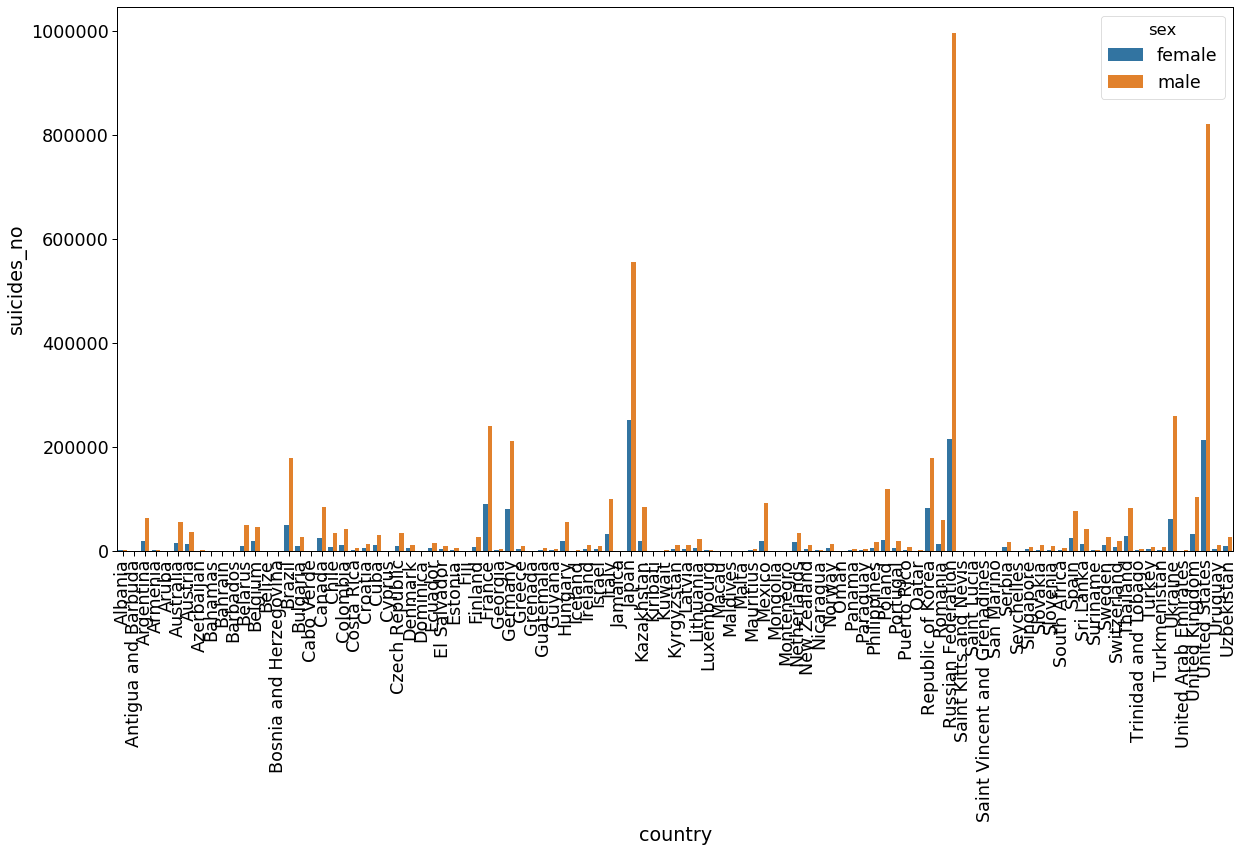

In [148]:
# suicide rate for gender difference

d=df.groupby(['sex','country'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(y='suicides_no', x='country', hue='sex', data=d)
plt.xticks(rotation=90)

Insight: 
- there is gender disparity by country wise suicide rates
- https://en.wikipedia.org/wiki/Gender_differences_in_suicide

In [167]:
# top 10 countries with highest avg_suicides_no

df.groupby('country')['suicides_no'].mean().reset_index().sort_values('suicides_no').tail(10)

,country,suicides_no
87,Sri Lanka,421.522727
69,Poland,482.979167
15,Brazil,609.174731
73,Republic of Korea,703.575269
33,France,914.241667
35,Germany,933.532051
95,Ukraine,952.232143
46,Japan,2169.091398
98,United States,2779.604839
75,Russian Federation,3733.771605


In [168]:
# top 10 countries with highest average suicides/100k pop
df.groupby('country')['suicides/100k pop'].mean().reset_index().sort_values('suicides/100k pop').tail(10)

,country,suicides/100k pop
95,Ukraine,26.582321
30,Estonia,27.276905
84,Slovenia,27.827857
51,Latvia,29.259325
47,Kazakhstan,30.511282
11,Belarus,31.075913
40,Hungary,32.761516
75,Russian Federation,34.892377
87,Sri Lanka,35.295152
52,Lithuania,40.415573


In [ ]:
#create lists of countries per continent
europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'] 
asia = ['Armenia', 'Bahrain', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']
northamerica = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
southamerica =  ['Argentina', 'Aruba', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Uruguay']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'] 
australiaoceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']

continents = {country: 'Asia' for country in asia}
continents.update({country: 'Europe' for country in europe})
continents.update({country: 'Africa' for country in africa})
continents.update({country: 'North_America' for country in northamerica})
continents.update({country: 'South_America' for country in southamerica})
continents.update({country: 'Australia_Oceania' for country in australiaoceania})

#map continents to countries
df['Continent'] = df['country'].map(continents)

In [249]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year($),gdp_per_capita($),generation,Continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe


In [252]:
df['year']=df['year'].astype(str)

In [259]:
#group data by continent
data_per_continent = df.groupby(['Continent','year'])['population','suicides/100k_pop','HDI_for_year','gdp_per_capita($)'].mean()
data_per_continent

population  suicides/100k_pop  HDI_for_year  \
Continent     year                                                  
Africa        1985  3.919583e+04          12.471250      0.575000   
              1986  3.981250e+04           2.222083           NaN   
              1987  4.040000e+04           9.694167           NaN   
              1988  7.708333e+04          20.509167           NaN   
              1989  7.774167e+04          17.636667           NaN   
...                          ...                ...           ...   
South_America 2011  2.515040e+06          12.388167      0.732667   
              2012  2.842532e+06          15.219907      0.738111   
              2013  2.873039e+06          13.013148      0.741889   
              2014  3.258738e+06          11.798125      0.757625   
              2015  4.299551e+06          10.764861           NaN   

                    gdp_per_capita($)  
Continent     year                     
Africa        1985        2085.000000  
              1986        2628.500000  
              1987        3174.500000  
              1988        2317.000000  
              1989        2349.000000  
...                               ...  
South_America 2011       12286.200000  
              2012       10452.777778  
              2013       10893.888889  
              2014       11470.125000  
              2015       11536.833333  

[190 rows x 4 columns]

In [267]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'HDI_for_year', 'gdp_for_year($)',
       'gdp_per_capita($)', 'generation', 'Continent'],
      dtype='object')

# preprocessing

In [286]:
## drop columns country and year as we have another col that also gives same information i.e, country-year

# this is mainly to reduce dimesion with redundant information

d=df.drop(['country','country-year','Continent','HDI_for_year'],axis=1)

In [287]:
d['gdp_for_year($)']=d['gdp_for_year($)'].str.replace(',','').astype(float)
d['gdp_for_year($)']

0        2.156625e+09
1        2.156625e+09
2        2.156625e+09
3        2.156625e+09
4        2.156625e+09
             ...     
27815    6.306708e+10
27816    6.306708e+10
27817    6.306708e+10
27818    6.306708e+10
27819    6.306708e+10
Name: gdp_for_year($), Length: 27820, dtype: float64

In [288]:
d.columns

Index(['year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k_pop',
       'gdp_for_year($)', 'gdp_per_capita($)', 'generation'],
      dtype='object')

In [289]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
year                 27820 non-null object
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k_pop    27820 non-null float64
gdp_for_year($)      27820 non-null float64
gdp_per_capita($)    27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 1.9+ MB


In [291]:
# encoding

#one -hot encoding
#d['year']=d['year'].astype(str)
from sklearn import preprocessing


mmc= preprocessing.MinMaxScaler().fit_transform(d[['suicides_no', 'population', 'suicides/100k_pop',
       'gdp_for_year($)', 'gdp_per_capita($)']])
mmc=pd.DataFrame(mmc)
mmc.columns=['suicides_no', 'population', 'suicides/100k_pop',
       'gdp_for_year($)', 'gdp_per_capita($)']

cols_to_one = ['sex','age','generation']

data=pd.get_dummies(d[cols_to_one],drop_first=True)

#mmc.drop(['sex','age','generation','year'],axis=1,inplace=True)

data=pd.concat([mmc,data],axis=1)
data


,suicides_no,population,suicides/100k_pop,gdp_for_year($),gdp_per_capita($),sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0.000940,0.007137,0.029826,0.000116,0.004322,1,0,0,0,0,0,0,1,0,0,0
1,0.000716,0.007025,0.023070,0.000116,0.004322,1,0,1,0,0,0,0,0,0,0,1
2,0.000627,0.006607,0.021470,0.000116,0.004322,0,0,0,0,0,0,0,1,0,0,0
3,0.000045,0.000491,0.020403,0.000116,0.004322,1,0,0,0,0,1,1,0,0,0,0
4,0.000403,0.006256,0.014580,0.000116,0.004322,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0.004790,0.082652,0.013157,0.003478,0.016320,0,0,1,0,0,0,0,1,0,0,0
27816,0.000403,0.007949,0.011468,0.003478,0.016320,0,0,0,0,0,1,0,0,0,0,1
27817,0.002686,0.063050,0.009646,0.003478,0.016320,1,0,0,1,0,0,0,0,1,0,0
27818,0.001970,0.060069,0.007423,0.003478,0.016320,0,0,0,1,0,0,0,0,1,0,0


In [292]:
data.shape

(27820, 16)

### Model creation

In [293]:
x=data.drop('suicides_no', axis = 1)
y= data['suicides_no']

In [301]:
x.shape,y.shape

((27820, 15), (27820,))

In [294]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [303]:
y_test

5820     0.020279
23242    0.005999
25643    0.001701
24011    0.029098
21706    0.000045
           ...   
20513    0.067150
11907    0.000179
4857     0.009356
17793    0.000224
2230     0.000358
Name: suicides_no, Length: 5564, dtype: float64

In [296]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [312]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [313]:
#fit a linear regression model

reg= LinearRegression()
reg= reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

r2= r2_score(y_test,y_pred)
print('regression score=',r2)

RMSE= 0.02380750347758759
regression score= 0.5208862024323799


In [304]:
#fit a decision tree model as comparision
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred

array([0.02032411, 0.00599875, 0.00210404, ..., 0.00953532, 0.00022383,
       0.00035813])

In [309]:
from sklearn.metrics import r2_score,mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

r2= r2_score(y_test,y_pred)
print('regression score=',r2)

RMSE= 0.0012363281705411464
regression score= 0.9987079524553196


In [310]:
# fit randomforestregressor
rf = RandomForestRegressor(n_estimators = 100, random_state=0)

# n_estimators indicates the number of trees in the forest

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

r2= r2_score(y_test,y_pred)
print('regression score=',r2)

RMSE= 0.0012363281705411464
regression score= 0.9987079524553196


In [311]:
#fit a gradient boosting model,
#compared to decision tree model, accuracy goes up
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

r2= r2_score(y_test,y_pred)
print('regression score=',r2)

RMSE= 0.0031469991162668704
regression score= 0.9916284821627812
